In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
df_train_1 = pd.read_csv('Train.csv')

###### df_train_1 has to still be split into training and cross-validation sets. Train on the training set. Check results with the cross-validation set.

In [60]:
df_train_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
df_test_1 = pd.read_csv('Test.csv')

In [62]:
df_test_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [63]:
df_train_1['Outlet_Size'].isnull().sum()

2410

In [64]:
df_train_1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [65]:
df_train_1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
df_train_1.groupby('Item_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Type,,,,,,,,,,,
Baking Goods,648,536,648,648,648,648,648,463,648,648,648
Breads,251,204,251,251,251,251,251,179,251,251,251
Breakfast,110,89,110,110,110,110,110,79,110,110,110
Canned,649,539,649,649,649,649,649,471,649,649,649
Dairy,682,566,682,682,682,682,682,496,682,682,682
Frozen Foods,856,718,856,856,856,856,856,615,856,856,856
Fruits and Vegetables,1232,1019,1232,1232,1232,1232,1232,883,1232,1232,1232
Hard Drinks,214,183,214,214,214,214,214,148,214,214,214
Health and Hygiene,520,430,520,520,520,520,520,367,520,520,520


In [67]:
df_train_1.boxplot(column='Item_Outlet_Sales',by='Outlet_Identifier')

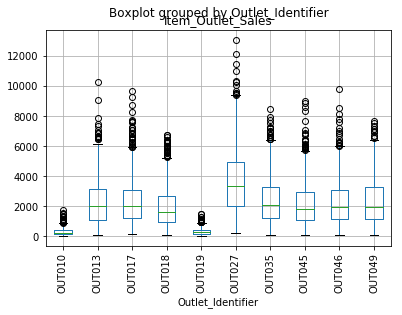

In [68]:
plt.xticks(rotation=90)
plt.show()

In [69]:
df_train_1.loc[lambda df: df.Outlet_Size.isnull(),:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [70]:
df_train_1.loc[lambda df: df.Item_Weight.isnull(),:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [71]:
df_train_1.loc[(~df_train_1['Item_Weight'].isnull()) & (df_train_1['Item_Identifier'] == 'DRD49')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
813,DRD49,9.895,Low Fat,0.167799,Soft Drinks,239.4564,OUT035,2004,Small,Tier 2,Supermarket Type1,5243.8408
2972,DRD49,9.895,Low Fat,0.168780,Soft Drinks,236.8564,OUT017,2007,NaN,Tier 2,Supermarket Type1,4767.1280
3289,DRD49,9.895,LF,0.167831,Soft Drinks,237.4564,OUT046,1997,Small,Tier 1,Supermarket Type1,715.0692
5017,DRD49,9.895,Low Fat,0.168171,Soft Drinks,237.7564,OUT045,2002,NaN,Tier 2,Supermarket Type1,3813.7024


#### For certain items we can look up the mean value from the rows where the value was entered and impute this into the missing values. 

For each Item_Identifier, look up the average of Item_Weight (when Item_Weight is given) and then impute it in the missing values for that Item_Identifier. If none of the observations for the Item_Identifier are Item_Weight provided then look up the mean of Item_Weight for all items in that Item_Type and use that.

In [72]:
df_train_1[(~df_train_1['Item_Weight'].isnull()) & (df_train_1['Item_Identifier'] == 'FDP10')]['Item_Weight'].mean()

19.0

In [73]:
#List of Item_Identifiers which have NULL values.
df_train_1[df_train_1['Item_Weight'].isnull()]['Item_Identifier']

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
36      FDV20
38      FDX10
39      FDB34
49      FDS02
59      FDI26
62      FDF09
63      FDY40
64      FDY45
77      FDN48
83      NCL18
84      FDR12
87      FDQ49
95      FDU04
98      NCP18
101     FDD10
108     DRE60
112     FDW39
113     FDX34
130     FDY25
132     NCR53
136     FDH35
153     DRK12
161     FDR07
168     NCB30
178     DRY23
        ...  
8349    FDN15
8351    NCE43
8353    NCX41
8356    FDN45
8358    FDK27
8362    FDY37
8367    FDA32
8372    FDA01
8373    FDX44
8375    NCM05
8383    NCQ54
8390    NCQ05
8404    DRH39
8405    FDB09
8422    FDD08
8435    FDT48
8442    FDX40
8444    FDO28
8449    FDG02
8454    NCH54
8458    FDX20
8463    FDG59
8469    FDQ45
8472    NCS41
8480    FDQ58
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [74]:
#This provides a seris of mean values that can be imputed for 
# Item_Weight where it is null for the given Item_Identifier.
Weight_Series = df_train_1[~df_train_1['Item_Weight'].isnull()].groupby('Item_Identifier').mean()['Item_Weight']
Weight_Series

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [75]:
df_train_1['Item_Weight'].fillna(Weight_Series,inplace=True)

In [76]:
df_train_1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For each Outlet_Identifier, look up the mode of Outlet_Size (when Outlet_Size is given) and then impute it in the missing values for that Outlet_Identifier. 
If none of the observations for the Outlet_Identifier have Outlet_Size provided then look up the mode of all Outlet_Identifiers and impute that.

In [77]:
df_train_1[(df_train_1['Outlet_Size'].isnull()) & (df_train_1['Outlet_Identifier'] == 'OUT017')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256
78,FDL04,19.000,Low Fat,0.112557,Frozen Foods,104.9622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1587.9330
85,FDG20,15.500,Regular,0.126399,Fruits and Vegetables,177.0028,OUT017,2007,NaN,Tier 2,Supermarket Type1,2479.4392
111,FDS52,8.890,low fat,0.005505,Frozen Foods,102.4016,OUT017,2007,NaN,Tier 2,Supermarket Type1,2732.4432
116,FDZ16,16.850,Regular,0.160760,Frozen Foods,192.4478,OUT017,2007,NaN,Tier 2,Supermarket Type1,4843.6950
118,DRA12,11.600,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772


In [78]:
Weight_Series

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [79]:
Weight_Series.get('DRA12')

11.6

In [80]:
type(Weight_Series)

pandas.core.series.Series

In [81]:
Weight_Frame = Weight_Series.to_frame()

In [82]:
type(Weight_Frame)

pandas.core.frame.DataFrame

In [83]:
Weight_Frame['indx'] = list(range(Weight_Frame.size))

In [84]:
Weight_Frame.set_index('indx',append=True,inplace=True)

In [85]:
Weight_Frame.reset_index('Item_Identifier')

,Item_Identifier,Item_Weight
indx,,
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
5,DRB24,8.785
6,DRB25,12.300
7,DRB48,16.750
8,DRC01,5.920


In [86]:
df_train_1[df_train_1['Outlet_Size'].isnull()].groupby('Outlet_Identifier').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,,
OUT010,555,555,555,555,555,555,555,0,555,555,555
OUT017,926,926,926,926,926,926,926,0,926,926,926
OUT045,929,929,929,929,929,929,929,0,929,929,929


##### Some data have only missing values. None of OUT010,017,045 have any mention of Outlet_Size. So we just take the mode of all Outlet_Size and use that.

In [87]:
#df_train_1[df_train_1.Outlet_Identifier=='OUT010' & ~df_train_1.Outlet_Size.isnull()]
df_train_1[(~df_train_1['Outlet_Size'].isnull()) & (df_train_1['Outlet_Identifier'] == 'OUT045')].size

0

In [88]:
s2=df_train_1['Outlet_Size']
s2.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

###### Get the mode of outlet_size. It is a series. Convert it to list. And get the first element of the list. And then use it to replace the NaNs. Yeeeesh!

In [89]:
df_train_1.Outlet_Size.fillna(df_train_1.Outlet_Size.mode().tolist()[0],inplace=True)

In [90]:
df_train_1.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

###### Most simplistic case of imputing average of all items for missing item_weights..just to get going.

In [91]:
df_train_1.Item_Weight.fillna(df_train_1.Item_Weight.mean(),inplace=True)

In [92]:
df_train_1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [93]:
df_train_1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [94]:
lim = -1 * len(df_train_1) * 8 //10

In [95]:
lim

-6819

In [96]:
df_cv = df_train_1.iloc[:lim] #Cross-validation set

In [97]:
df_tr = df_train_1.iloc[lim:] #Training set

In [99]:
len(df_cv)

1704

In [100]:
from sklearn.preprocessing import LabelEncoder
predictors =["Item_Identifier","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]
var_mod = predictors
le = LabelEncoder()
for i in var_mod:
    df_tr[i] = le.fit_transform(df_tr[i])
    df_cv[i] = le.fit_transform(df_cv[i])
df_tr.dtypes

/Users/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility                int64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [101]:
import sklearn.linear_model

# Select three predictors Credit_History, Education and Gender


# Converting predictors and outcome to numpy array
x_train = df_tr[predictors].values
y_train = df_tr['Item_Outlet_Sales'].values

# Model Building
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
x_cv = df_cv[predictors].values
y_cv = model.predict(x_cv)

In [103]:
y_cv

array([ 1752.55535327,  1218.21627268,  1232.96010918, ...,    48.86388154,
         839.81300041,  1927.75781599])

In [104]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ -2.30122074e-02   2.08601470e+01  -3.73868496e-02  -4.60610369e+00
   6.63263384e-01   5.42152748e+01  -6.51697609e+01   8.60843992e+02]


In [105]:
###WIP
##To be MSE and R2 are to be done between the predicted and actual values in the 
##  CROSS-VALIDATION set yet to be created from the original TRAINING set.

# The mean squared error
print("Mean squared error: " + mean_squared_error(df_tr['Item_Outlet_Sales'], y_cv))
# Explained variance score: 1 is perfect prediction
print('Variance score:     ' + r2_score(df_tr['Item_Outlet_Sales'], y_cv))


ValueError: Found input variables with inconsistent numbers of samples: [6819, 1704]

In [106]:
###WIP.
##Need to split the main training set into training + cross-validation.
##Then train the model with the training subset. Predict results with cross-validation subset.
##
##The current Test.csv has no results to validate with. I suppose that is just to submit the final result.

# Plot outputs
plt.scatter(df_tr['Item_Outlet_Sales'], df_cv['Item_Outlet_Sales'],  color='black')
plt.plot(df_tr['Item_Outlet_Sales'], y_cv, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: x and y must be the same size